<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Euler and Runge Kutta (RK4) solution**

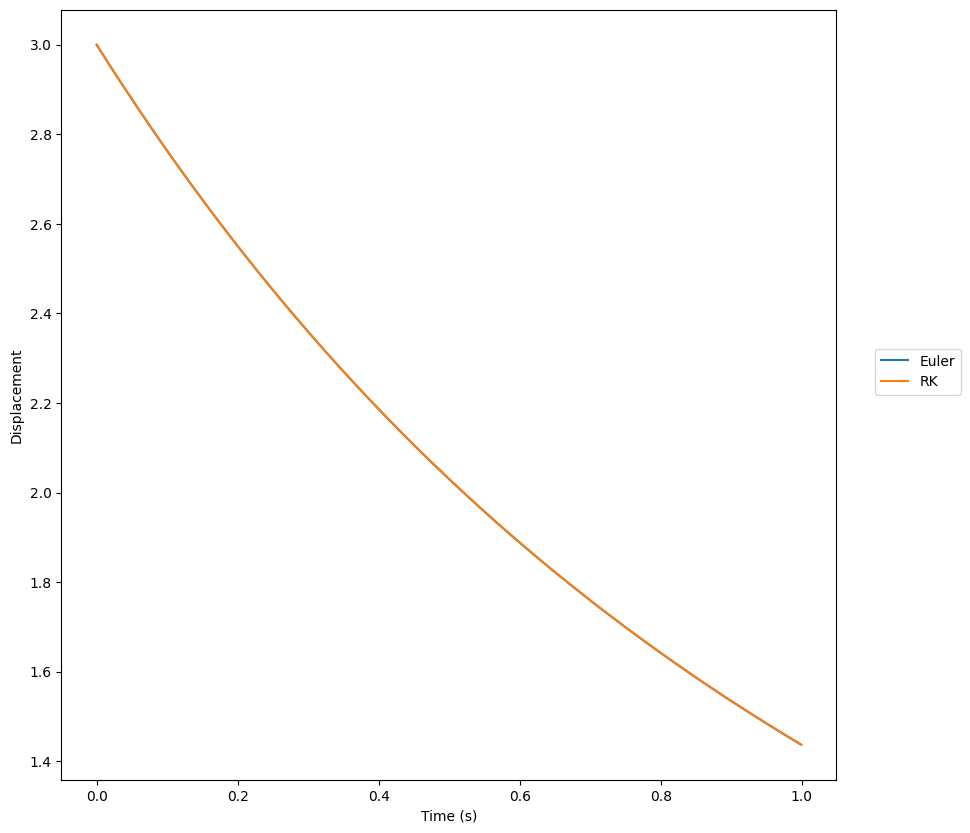

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lorenz equations
def ode_class(t, state):
    y1, y2 = state
    f1 = y2
    f2 = -2*y2 -0.75*y1
    return np.array([f1, f2])

# Define the Euler method
def euler(f, y0, t, h):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        y[i+1] = y[i] + h*f(t[i], y[i])
    return y

# Define the Runge-Kutta method
def runge_kutta(f, y0, t, h):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        k1 = h*f(t[i], y[i])
        k2 = h*f(t[i] + h/2, y[i] + k1/2)
        k3 = h*f(t[i] + h/2, y[i] + k2/2)
        k4 = h*f(t[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

# Define the initial conditions and time steps
y1_0, y2_0 = (3, -2.5)
t = np.arange(0, 1, 0.001)
h = t[1] - t[0]

# Use the Runge-Kutta method to solve the Lorenz equations
solution1 = euler(ode_class, (y1_0, y2_0), t, h)
solution2 = runge_kutta(ode_class, (y1_0, y2_0), t, h)

# Plot the results
fig = plt.figure(figsize=(10, 10))
plt.plot(t,solution1[:, 0],label="Euler")
plt.plot(t,solution2[:, 0],label="RK")
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend(loc=(1.05,0.5))
plt.show()